# Сборный проект -1


СПРИНТ 5

<a name="title"></a>
### Содержание

[Описание проекта](#info)
1. [Открытие и Предобработка](#start)
2. [Анализ данных](#analitika)
  - [Динамика продаж по годам](#by_year)
  - [Платформы](#by_platform)
  - [Жанры](#by_genre)
  - [Резюме по разделу](#rezume02)
3. [Портрет пользователя каждого региона](#users)
  - [Резюме по разделу](#rezume03)
4. [Проверка гипотез](#gipoteza)
    * [Средние пользовательские рейтинги платформ](#gipoteza01)
    * [Средние пользовательские рейтинги жанров](#gipoteza02)    
5. [Общий вывод](#general)

<a name="info"></a>
# Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Цель**: Нам нужно выявить определяющие успешность игры закономерности. 

Нужно отработать принцип работы с данными.

Это позволит сделать ставку на **потенциально популярный продукт** и спланировать рекламные кампании.

*Перед нами данные до 2016 года.* 


[к содержанию...](#title)

<a name="start"></a>
# Открытие  и Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим названия столбцов убрав заглавные буквы и сократив их...

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.columns = ['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

Осмотрим данные и их количественно-качественный состав:

In [6]:
df.sample(3)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11220,BIT.TRIP COMPLETE,Wii,"2,011.00",Misc,0.06,0.02,0.00,0.01,84.00,8.7,E
13498,Looney Tunes: Cartoon Conductor,DS,"2,008.00",Misc,0.04,0.00,0.00,0.00,67.00,tbd,E
15706,Kong: The Animated Series,GBA,"2,002.00",Action,0.01,0.00,0.00,0.00,52.00,tbd,E


In [7]:
df.describe(include='all')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16713,16715,"16,446.00",16713,"16,715.00","16,715.00","16,715.00","16,715.00","8,137.00",10014,9949
unique,11559,31,nan,12,nan,nan,nan,nan,nan,96,8
top,Need for Speed: Most Wanted,PS2,nan,Action,nan,nan,nan,nan,nan,tbd,E
freq,12,2161,nan,3369,nan,nan,nan,nan,nan,2424,3990
mean,NaN,NaN,"2,006.48",NaN,0.26,0.15,0.08,0.05,68.97,NaN,NaN
std,NaN,NaN,5.88,NaN,0.81,0.50,0.31,0.19,13.94,NaN,NaN
min,NaN,NaN,"1,980.00",NaN,0.00,0.00,0.00,0.00,13.00,NaN,NaN
25%,NaN,NaN,"2,003.00",NaN,0.00,0.00,0.00,0.00,60.00,NaN,NaN
50%,NaN,NaN,"2,007.00",NaN,0.08,0.02,0.00,0.01,71.00,NaN,NaN
75%,NaN,NaN,"2,010.00",NaN,0.24,0.11,0.04,0.03,79.00,NaN,NaN


***
### 'name'
Пропусков всего два, но не будем удалять их заменим на "неизвестно".

Так же приведем названия игр к нижнему регистру.

In [8]:
df.name = df.name.fillna('unknown')

In [9]:
df.name = df.name.str.lower()

***
### 'platform'
Здесь в плане пропусков все Ок, посмотрим как дела с уникальными значениями:

In [10]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

***
### 'year'
Информация крайне важна для нас в последующих расчетах и анализе - риск искажения в данном случае неуместен, теоретически можно было бы частично восстановить по годам в названии игр, но процент пропусков не велик (1.6), удалим пропуски:

In [11]:
df = df.dropna(subset = ['year'])

Изменим тип данных на *int*:

In [12]:
df.year = df.year.astype('int')
#df.year = pd.DatetimeIndex(pd.to_datetime(df['year'], format='%Y')).year

***
### 'genre'
Пропусков всего два, но не будем удалять их, заменим на "неизвестно" *(кстати пропуски пересекаются с пропусками в 'name' и принадлежат 1993 году*):

In [13]:
df[df.genre.isnull()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,unknown,GEN,1993,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


Переведем все буквы в названиях к нижнему регистру:

In [14]:
df.genre = df.genre.str.lower()
df.genre.unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

***
### 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'
Данные столбцы не содержат пропусков, тип данных соответствует *float*. 

Для дальнейшего анализа добавим столбец 'total_sales':

In [15]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

#### Предварительно оценим распределение 'total_sales':

In [16]:
df.total_sales.describe()

count   16,446.00
mean         0.54
std          1.56
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: total_sales, dtype: float64

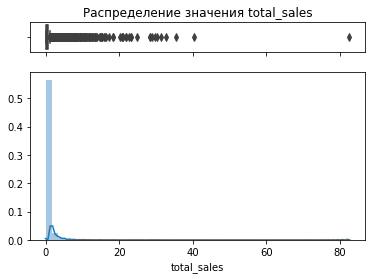

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["total_sales"], ax=ax_box)
sns.distplot(df["total_sales"], ax=ax_hist, hist=True, kde=True)
ax_box.set(title='Распределение значения total_sales')
ax_box.set(xlabel='')
plt.show()

#### Посмотрим от 5 млн. копий

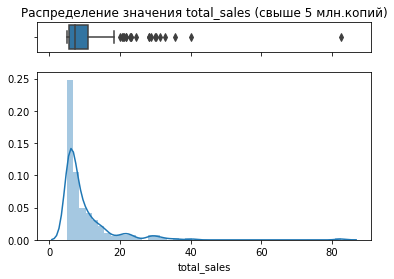

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df.query('total_sales > 5')["total_sales"], ax=ax_box)
sns.distplot(df.query('total_sales > 5')["total_sales"], ax=ax_hist, hist=True, kde=True)
ax_box.set(title='Распределение значения total_sales (свыше 5 млн.копий)')
ax_box.set(xlabel='')
plt.show()

Похоже это тот самый случай когда Гейтс зашел в бар, да еще и с друзьями...
в прочем как раз эти товарищи и будут нам интересны, так что **оставляем пока все как есть**

***
### 'critic_score', 'user_score'
Решение о пропусках в данных столбцах примем позже в ходе анализа, 
значения данных *user_score* необходимо перевести в вещественный тип.

По мимо НаН, в столбце содержится большое количество (более 2700) значений 'tbd'. Обычно данная аббревиатура говорит о том что на момент заполнения данная информация не определена и подлежит определению в дальнейшем.

На текущий момент, зависимости данной величины не очивидны, для их поиска и определения нам в любом случае придется преобразовать столбец к float и пожертвовать значениями 'tbd'.

Возможно если в ходе анализа станет доступным оценочный расчет данной величины, мы сможем вернуться на данный этап и произвести замену.

А пока утопим 'tbd' в море Nan...

In [19]:
df.query('user_score == "tbd"')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,zumba fitness,Wii,2010,sports,3.45,2.59,0.00,0.66,nan,tbd,E,6.70
301,namco museum: 50th anniversary,PS2,2005,misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+,3.97
520,zumba fitness 2,Wii,2011,sports,1.51,1.03,0.00,0.27,nan,tbd,T,2.81
645,udraw studio,Wii,2010,misc,1.65,0.57,0.00,0.20,71.00,tbd,E,2.42
718,just dance kids,Wii,2010,misc,1.52,0.54,0.00,0.18,nan,tbd,E,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,GBA,2001,action,0.01,0.00,0.00,0.00,67.00,tbd,E,0.01
16697,bust-a-move 3000,GC,2003,puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E,0.01
16698,mega brain boost,DS,2008,puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E,0.01
16704,plushees,DS,2008,simulation,0.01,0.00,0.00,0.00,nan,tbd,E,0.01


In [20]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

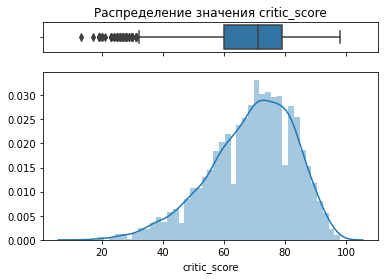

In [21]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["critic_score"], ax=ax_box)
sns.distplot(df["critic_score"], ax=ax_hist, hist=True, kde=True)
ax_box.set(title='Распределение значения critic_score')
ax_box.set(xlabel='')
plt.show()

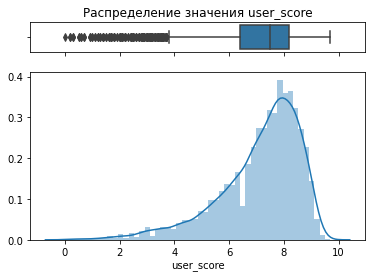

In [22]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["user_score"], ax=ax_box)
sns.distplot(df["user_score"], ax=ax_hist, hist=True, kde=True)
ax_box.set(title='Распределение значения user_score')
ax_box.set(xlabel='')
plt.show()

***
### 'rating'
Категориальная переменная, для порядка - осмотрим уникальные значения и смело меняем пропуски на "unknown", при желании всегда сможем отфильтровать:

In [23]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [24]:
df.rating = df.rating.fillna('unknown')

***
#### Избавимся от дубликатов, сбросим индекс, оценим результат нашей работы и сделаем промежуточный вывод:

In [25]:
df = df.drop_duplicates().reset_index(drop=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16446 non-null  object 
 1   platform      16446 non-null  object 
 2   year          16446 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16446 non-null  float64
 5   eu_sales      16446 non-null  float64
 6   jp_sales      16446 non-null  float64
 7   other_sales   16446 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    7463 non-null   float64
 10  rating        16446 non-null  object 
 11  total_sales   16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
df.describe(include='all')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
count,16446,16446,"16,446.00",16444,"16,446.00","16,446.00","16,446.00","16,446.00","7,983.00","7,463.00",16446,"16,446.00"
unique,11427,31,nan,12,nan,nan,nan,nan,nan,nan,9,nan
top,need for speed: most wanted,PS2,nan,action,nan,nan,nan,nan,nan,nan,unknown,nan
freq,12,2127,nan,3307,nan,nan,nan,nan,nan,nan,6678,nan
mean,NaN,NaN,"2,006.48",NaN,0.26,0.15,0.08,0.05,68.99,7.13,NaN,0.54
std,NaN,NaN,5.88,NaN,0.82,0.51,0.31,0.19,13.92,1.50,NaN,1.56
min,NaN,NaN,"1,980.00",NaN,0.00,0.00,0.00,0.00,13.00,0.00,NaN,0.00
25%,NaN,NaN,"2,003.00",NaN,0.00,0.00,0.00,0.00,60.00,6.40,NaN,0.06
50%,NaN,NaN,"2,007.00",NaN,0.08,0.02,0.00,0.01,71.00,7.50,NaN,0.17
75%,NaN,NaN,"2,010.00",NaN,0.24,0.11,0.04,0.03,79.00,8.20,NaN,0.47


### Вывод:

На первом этапе произведено открытие файла, импортированы необходимые библиотеки.

**В ходе предварительной обработки** каждого столбца произведены необходимые **замены пропусков** и по необходимости **преобразованы типы данных**.

Из 16 715 строк сохранены **16 446**.

Открытыми остались вопросы по пропускам в столбцах оценок  и значению **"tdb" в 'user_score'** 

[к содержанию...](#title)

<a name="analitika"></a>
# Анализ данных

<a name="by_year"></a>
## Динамика продаж по годам

In [28]:
df.groupby('year')['total_sales'].agg(['count', 'sum'])

,count,sum
year,,
1980,9,11.38
1981,46,35.68
1982,36,28.88
1983,17,16.80
1984,14,50.35
1985,14,53.95
1986,21,37.08
1987,16,21.70
1988,15,47.21


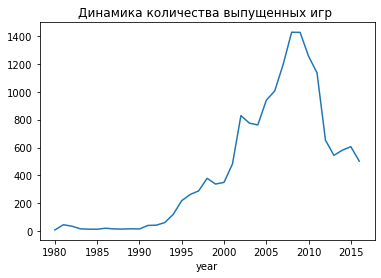

In [29]:
plt.title('Динамика количества выпущенных игр ')
df.groupby('year')['total_sales'].count().plot()
plt.show()

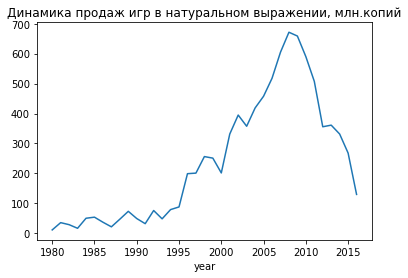

In [30]:
plt.title('Динамика продаж игр в натуральном выражении, млн.копий')
df.groupby('year')['total_sales'].sum().plot()
plt.show()

### Вывод:
Оценивая динамику количества выпускаемых игр можем отметить начало активного роста с 94-95 в плоть до пика более 1400 игр в 2008-2009. Далее начинается спад, скорее всего вызванный мировым кризисом 2008 и стабилизация на уровне **600 игр в год с 2012 по 2016 г.г.**

*Скорее всего "плюс/минус" именно этот период и будет интересен нам в исследовании, так как "золотые нулевые" вряд ли добавят ему актуальности.*

На текущем этапе отсеим малозначительные для нас данные старше 1995 года.

In [31]:
df = df.query('year >=1995')

[к содержанию...](#title)

<a name="by_platform"></a>
## Платформы

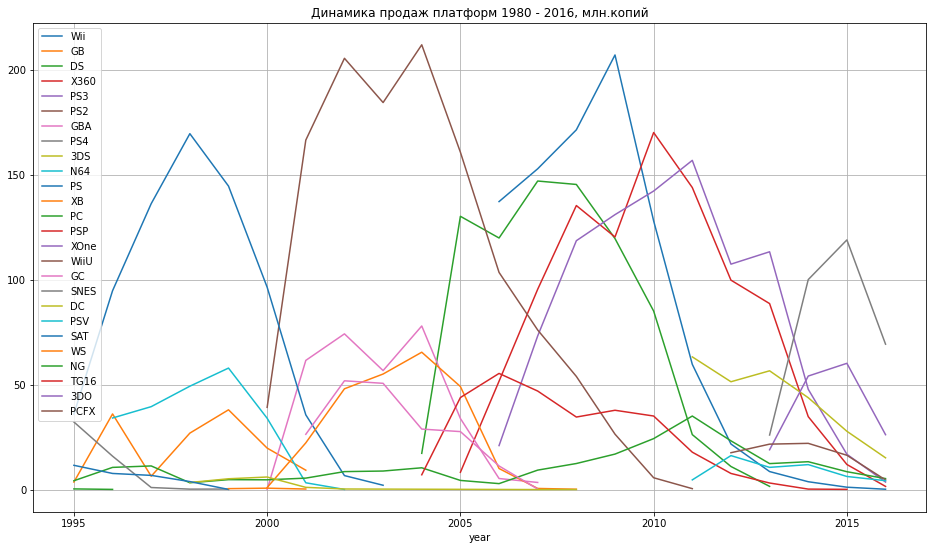

In [32]:
plt.figure(figsize=(16,9))
plt.title('Динамика продаж платформ 1980 - 2016, млн.копий')
for i in df.platform.unique():
    df.query('platform == @i').groupby(['year'])['total_sales'].sum().plot(label=i)
plt.legend()
plt.grid()
plt.show()

#### Красиво, но перегружено... 
Соберем сводник - динамика продаж платформ по годам, дополнительно рассчитаем количество лет "жизни" для каждой платформы и изучим данную величину. 

In [33]:
sales = df.pivot_table(index='platform',
                       columns='year', 
                       values='total_sales', 
                       aggfunc='sum')
sales['count_years'] = sales.count(axis=1)
sales['total'] = sales.sum(axis=1)
sales = sales.sort_values(by='total', ascending=False)
#sales

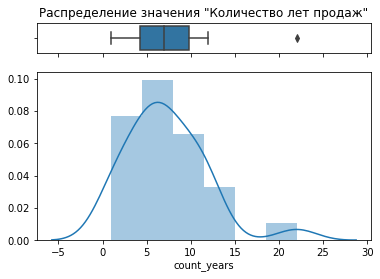

In [34]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(sales['count_years'], ax=ax_box)
sns.distplot(sales['count_years'], ax=ax_hist, hist=True, kde=True)
ax_box.set(title='Распределение значения "Количество лет продаж"')
ax_box.set(xlabel='')
plt.show()

In [35]:
sales['count_years'].describe()

count   26.00
mean     7.19
std      4.60
min      1.00
25%      4.25
50%      7.00
75%      9.75
max     22.00
Name: count_years, dtype: float64

#### И так средний цикл жизни платформы 7 лет

За интервал 13 лет вываливается только ПК, что вполне логично.

Для целей нашего исследования оставим пока интервал равный двум жизненным циклам - 2003-2016г.г.

*(Двойной интервал оставим в надежде увидеть нечто важное в истории и отсеять умирающие платформы)*

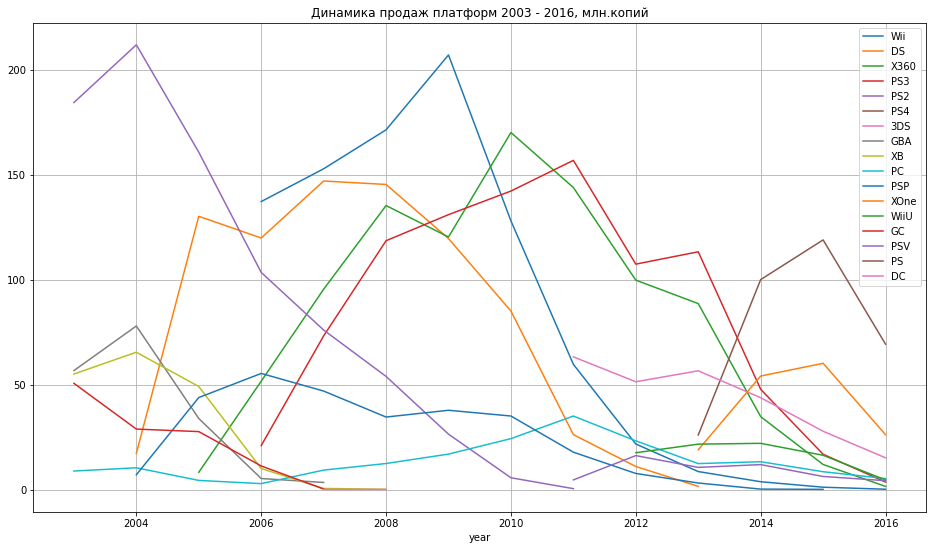

In [36]:
plt.figure(figsize=(16,9))
plt.title('Динамика продаж платформ 2003 - 2016, млн.копий')
for i in df.query('year >= 2003').platform.unique():
    df.query('platform == @i & year >= 2003')\
      .groupby(['year'])['total_sales'].sum().plot(label=i)
plt.legend()
plt.grid()
plt.show()

Сделаем еще один промежуточный свод - удалим платформы для которых игры уже не выходили в 2016, а так же те "срок жизни" которых более 10 лет *(Да-да, дни Wii, PS3, X360 уже сочтены... А вот PC оставим, как же мы без третьих героев...)*

In [37]:
sales2 = df.query('year >= 2003').pivot_table(index='platform', columns='year', values='total_sales', aggfunc='sum')
sales2['count_years'] = sales2.count(axis=1)
sales2['total'] = sales2.sum(axis=1)
sales2 = sales2.query('count_years < 10 | index == "PC"')
sales2 = sales2.dropna(subset=[2016])
sales2.sort_values(by='total', ascending=False)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,count_years,total
platform,,,,,,,,,,,,,,,,
PS4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,25.99,100.00,118.90,69.25,4,318.14
3DS,nan,nan,nan,nan,nan,nan,nan,nan,63.20,51.36,56.57,43.76,27.78,15.14,6,263.81
PC,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,14,201.02
XOne,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,18.96,54.07,60.14,26.15,4,163.32
WiiU,nan,nan,nan,nan,nan,nan,nan,nan,nan,17.56,21.65,22.03,16.35,4.60,5,87.19
PSV,nan,nan,nan,nan,nan,nan,nan,nan,4.63,16.19,10.59,11.90,6.25,4.25,6,59.81


### Итого мы имеем первый главный вывод: 
**Перспективные платформы**: '3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne'

**Актуальный период**: 2010-2016г.г.

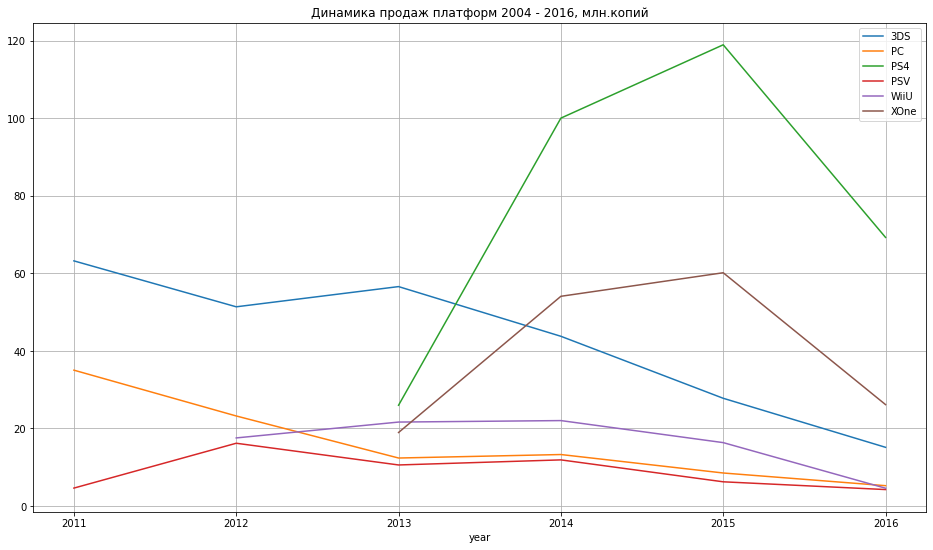

In [38]:
plt.figure(figsize=(16,9))
plt.title('Динамика продаж платформ 2004 - 2016, млн.копий')
for i in ['3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne']:
    df.query('platform == @i & year >2010').groupby(['year'])['total_sales'].sum().plot(label=i)
plt.legend()
plt.grid()
plt.show()

### Проверим себя: 
Какой объем продаж мы закрываем выбранными платформами в 2016 году?

In [39]:
sales2[2016].sum() / df.query('year == 2016').total_sales.sum()

0.9592119439741419

**96%** - более чем для наших целей.

## «Ящик с усами» по глобальным продажам игр в разбивке по платформам

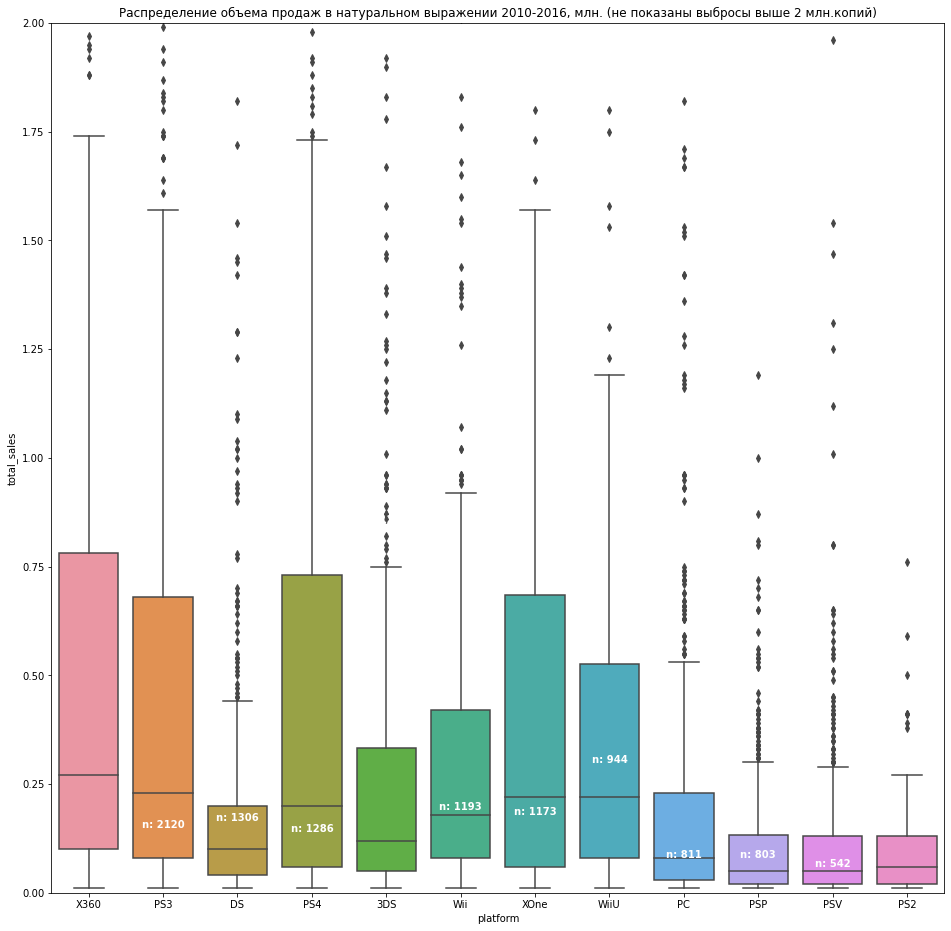

In [40]:

plt.figure(figsize=(16,16))
ax = sns.boxplot(x="platform", y="total_sales", data=df.query('year >=2010'))
plt.title('Распределение объема продаж в натуральном выражении 2010-2016, млн. (не показаны выбросы выше 2 млн.копий)') 
plt.ylim(0, 2)
# Calculate number of obs per group & median to position labels
medians = df.groupby(['platform'])['total_sales'].median().values
nobs = df['platform'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center',  color='w', weight='semibold')
plt.show()

### Второй главный вывод:
Выбросы? Да нет, скорее бестселлеры...

Ящик? - Серая обыденность.

 ## Влияние отзывов пользователей и критиков на продажи
 
 Оценим данное влияние на примере самой популярной за все время наблюдений платформы PS2 и сравним выводы с популярной сейчас PS4.
 
 Оценки пользователей умножим на 10, чтобы привести их к одному масштабу с оценками критиков.


In [41]:
ps2 = df.query('platform == "PS2"')

In [42]:
ps2.corr()

,year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year,1.00,-0.15,-0.21,-0.11,0.01,-0.10,-0.10,-0.16
na_sales,-0.15,1.00,0.66,0.20,0.57,0.40,0.17,0.92
eu_sales,-0.21,0.66,1.00,0.23,0.31,0.30,0.13,0.78
jp_sales,-0.11,0.20,0.23,1.00,0.18,0.22,0.15,0.40
other_sales,0.01,0.57,0.31,0.18,1.00,0.21,0.07,0.71
critic_score,-0.10,0.40,0.30,0.22,0.21,1.00,0.57,0.39
user_score,-0.10,0.17,0.13,0.15,0.07,0.57,1.00,0.18
total_sales,-0.16,0.92,0.78,0.40,0.71,0.39,0.18,1.00


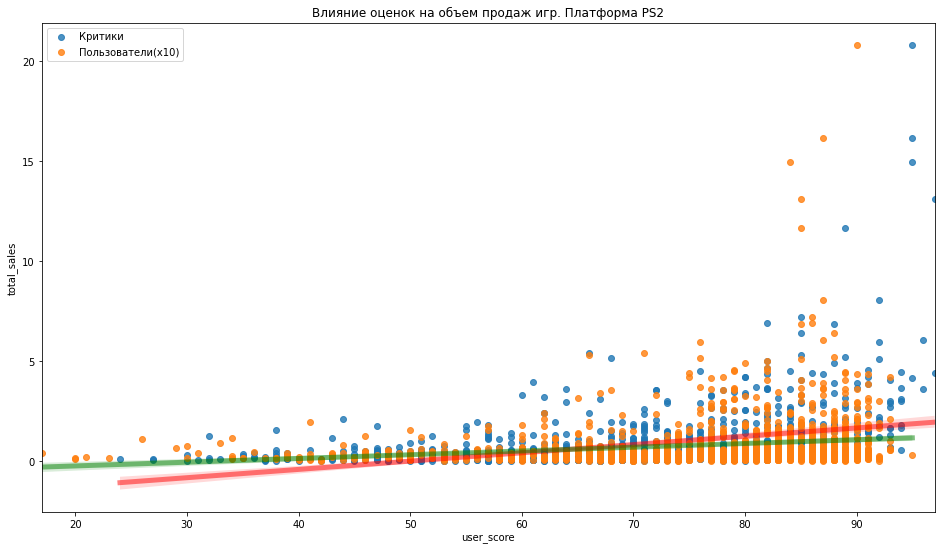

In [43]:
plt.figure(figsize=(16,9))
plt.title('Влияние оценок на объем продаж игр. Платформа PS2')
sns.regplot(x=ps2["critic_score"], y=ps2["total_sales"], label='Критики', line_kws={"color":"r","alpha":0.5,"lw":5})
sns.regplot(x=ps2["user_score"]*10, y=ps2["total_sales"], label='Пользователи(х10)', line_kws={"color":"g","alpha":0.5,"lw":5})
plt.legend()
plt.show()

**Существует слабая прямая корреляция между оценками игр и их продажами**:

Критики - 0,39

Пользователи - 0,18

Стоит отметить, что мнение критиков оказывает большее влияние на продажи игры.

In [44]:
ps4 = df.query('platform == "PS4"')
ps4.corr()

,year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year,1.00,-0.25,-0.21,-0.06,-0.23,-0.02,0.15,-0.24
na_sales,-0.25,1.00,0.79,0.47,0.94,0.42,-0.02,0.93
eu_sales,-0.21,0.79,1.00,0.46,0.94,0.35,-0.05,0.96
jp_sales,-0.06,0.47,0.46,1.00,0.50,0.32,0.17,0.53
other_sales,-0.23,0.94,0.94,0.50,1.00,0.41,-0.04,1.00
critic_score,-0.02,0.42,0.35,0.32,0.41,1.00,0.56,0.41
user_score,0.15,-0.02,-0.05,0.17,-0.04,0.56,1.00,-0.03
total_sales,-0.24,0.93,0.96,0.53,1.00,0.41,-0.03,1.00


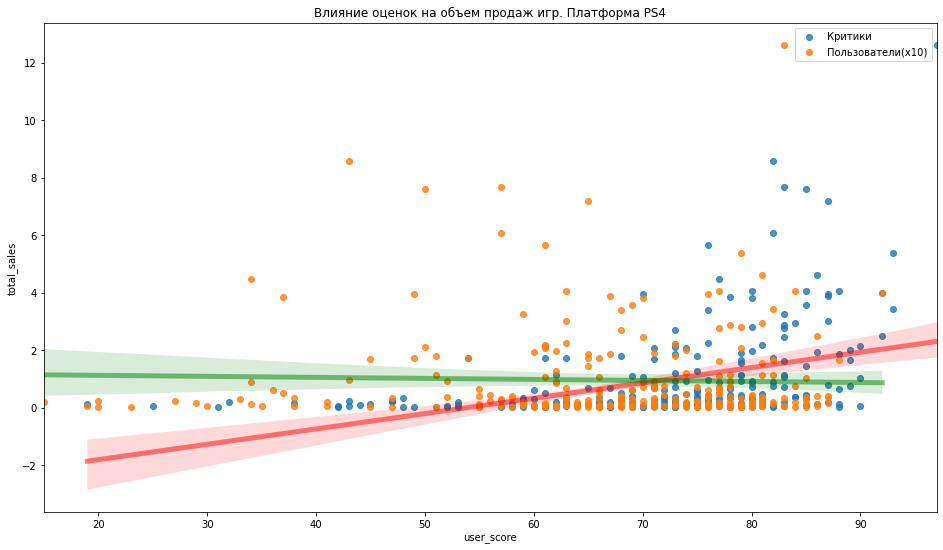

In [45]:
plt.figure(figsize=(16,9))
plt.title('Влияние оценок на объем продаж игр. Платформа PS4')
sns.regplot(x=ps4["critic_score"], y=ps4["total_sales"], label='Критики', line_kws={"color":"r","alpha":0.5,"lw":5})
sns.regplot(x=ps4["user_score"]*10, y=ps4["total_sales"], label='Пользователи(х10)', line_kws={"color":"g","alpha":0.5,"lw":5})
plt.legend()
plt.show()

**Существует слабая прямая корреляция между оценками игр критиками, зависимости от оценок пользователей нет**:

Критики - 0,4

Пользователи - -0,03

Стоит отметить, что за последние 10 лет влияние критиков практически не изменилось, а вот влияние оценок пользователей снизошло на нет... 

### Третий главный вывод:
*Пользователи скорее прислушиваются к мнению экспертов и агентов влияния, чем к оценкам себе подобных*

[к содержанию...](#title)

<a name="by_genre"></a>
## Жанры

In [46]:
df.groupby('genre')['total_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False)

,count,sum
genre,,
action,3222,"1,645.07"
sports,2238,"1,258.33"
shooter,1247,967.94
role-playing,1434,888.47
misc,1701,773.67
racing,1203,692.41
platform,808,611.83
fighting,792,402.57
simulation,842,379.12


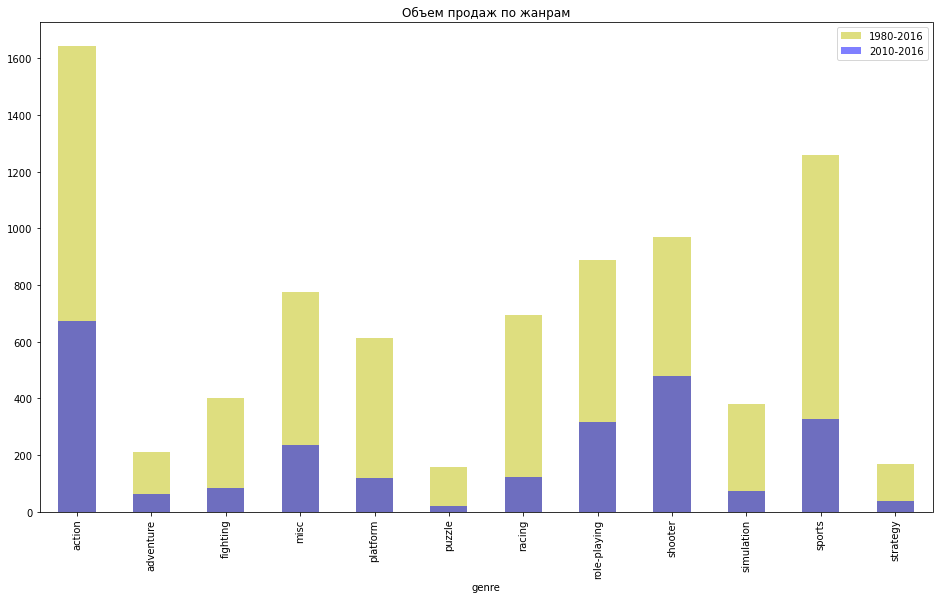

In [47]:
plt.figure(figsize=(16,9))
plt.title('Объем продаж по жанрам')
df.groupby('genre')['total_sales'].sum().plot(kind='bar',
                                              alpha=0.5, color='y', label='1980-2016')
df.query('year >= 2010').groupby('genre')['total_sales'].sum().plot(kind='bar',
                                                                    color='b',
                                                                    alpha=0.5,
                                                                    label='2010-2016')
plt.legend()
plt.show()

### Четвертый главный вывод:
Наиболее объемными с точки зрения продаж являются: Экшены, спортивные игры и шутеры, которые за последнии 7 лет подвинули спортивные игры со второго места.

К нишевым продажам можно отнести: стратегии, приключения и пазлы. Так же за последние 7 лет сильно сократились продажи симуляторов, гонок и платформио.

<a name="rezume02"></a>
## Резюме по разделу:

Оценивая динамику количества выпускаемых игр можем отметить **начало активного роста с 94 и 95 годов** вплоть **до пика более чем в 1400 игр в 2008-2009**. Далее **имеем спад**, скорее всего вызванный мировым кризисом 2008 и **стабилизацию на уровне 600 игр в год с 2012 по 2016 г.г.**

В ходе проведенного исследования было установлено, что:

#### средний цикл жизни платформы 7 лет.

За интервал 13 лет вываливается только ПК, что вполне логично.

#### Для целей нашего исследования будем использовать интервал 2010-2016 (Актуальный период).

И так основные выводы сделанный в ходе анализа:

#### 1. Перспективные платформы: '3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne'

*к сожалению текущие тренды всех платформ находятся на нисходящей, однако выбранный платформы позволяют нам охватить 96% рынка*

#### 2. Анализ распределения продаж с помощью ящика с усами,
показывает нам большое количество выбросов направленных вправо. Это говорит **о неоднородности исследуемой величины, но ошибки здесь нет**, просто в выборке **присутствуют как бестселлеры с много миллионными тиражами, так и рядовые проходные проекты**.

#### 3. Касаемо влияния на продажи оценок экспертов и пользователей:

**Пользователи скорее прислушиваются к мнению экспертов и агентов влияния, чем к оценкам себе подобных**.

**Существует слабая прямая корреляция (0,4) между оценками игр критиками, зависимости от оценок пользователей нет**:

Стоит отметить, что за последние 10 лет влияние критиков практически не изменилось, а вот влияние оценок пользователей снизошло на нет...

#### 4 Анализ жанров показал нам:

Наиболее **объемными с точки зрения продаж** являются: **Экшены, спортивные игры и шутеры**, которые кстати за последние 7 лет подвинули спортивные игры со второго места.

К **нишевым продажам можно отнести: стратегии, приключения и пазлы**. Объема здесь нет, но своя аудитория имеется. Так же за последние 7 лет сильно сократились продажи симуляторов, гонок и платформио.

[к содержанию...](#title)

<a name="users"></a>
# Портрет пользователя

Определим для пользователя каждого региона (NA, EU, JP):

    Самые популярные платформы (топ-5).
    Самые популярные жанры (топ-5). 
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

И так по порядку **Платформы:**

In [48]:
na = df.query('year >= 2010').groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

In [49]:
eu = df.query('year >= 2010').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

In [50]:
jp = df.query('year >= 2010').groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

In [51]:
na_eu = pd.merge(na, eu, left_index=True, right_index=True, how='outer')
na_eu_jp = pd.merge(na_eu, jp, left_index=True, right_index=True, how='outer')
na_eu_jp

,na_sales,eu_sales,jp_sales
platform,,,
3DS,nan,nan,100.62
DS,nan,nan,27.90
PC,nan,68.82,nan
PS3,229.25,213.60,59.26
PS4,108.74,141.09,nan
PSP,nan,nan,42.20
PSV,nan,nan,21.84
Wii,121.20,65.91,nan
X360,334.18,163.41,nan


<Figure size 1152x648 with 0 Axes>

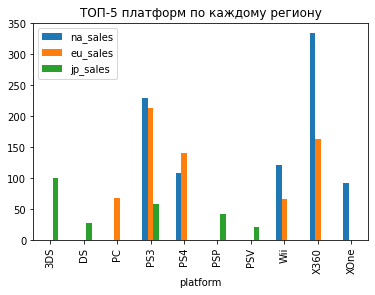

In [52]:
plt.figure(figsize=(16,9))
na_eu_jp.plot(kind='bar')
plt.title('ТОП-5 платформ по каждому региону')
plt.show()

#### Вывод:
Наиболее популярной платформой в Штатах является Xbox360, в Европе третья плойка, в Японии 3DS.

И так по порядку **Жанры:**

In [53]:
na_genre = df.query('year >= 2010').groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

In [54]:
eu_genre = df.query('year >= 2010').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

In [55]:
jp_genre = df.query('year >= 2010').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

In [56]:
na_eu_genre = pd.merge(na_genre, eu_genre, left_index=True, right_index=True, how='outer')
na_eu_jp_genre = pd.merge(na_eu_genre, jp_genre, left_index=True, right_index=True, how='outer')
na_eu_jp_genre

,na_sales,eu_sales,jp_sales
genre,,,
action,290.64,233.63,72.20
adventure,nan,nan,15.67
misc,123.80,66.09,24.29
platform,nan,nan,15.81
role-playing,112.05,75.48,103.54
shooter,237.47,171.45,nan
sports,156.81,116.84,nan


<Figure size 1152x648 with 0 Axes>

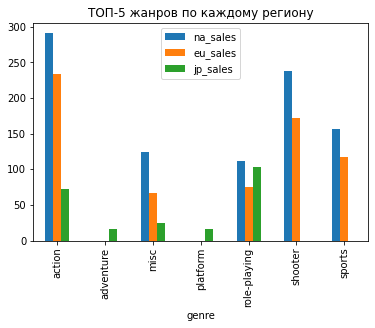

In [57]:
plt.figure(figsize=(16,9))
na_eu_jp_genre.plot(kind='bar')
plt.title('ТОП-5 жанров по каждому региону')
plt.show()

#### Вывод:
Единственное в чем близки Восток и Запад - это в любви к РПГ. 

В Америке и Европе наиболее популярны экшены, стрелялки и спорт.

#### ESRB

In [58]:
esrb = df.query('year >= 2010').pivot_table(index='rating',
                      values = ('na_sales', 'eu_sales', 'jp_sales'), 
                      aggfunc='sum')
esrb = esrb.sort_values(by='na_sales', ascending=False)

<Figure size 1152x648 with 0 Axes>

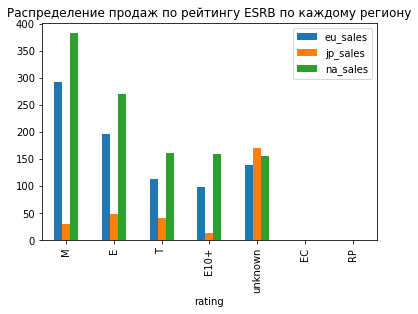

In [59]:
plt.figure(figsize=(16,9))
esrb.plot(kind='bar')
plt.title('Распределение продаж по рейтингу ESRB по каждому региону')
plt.show()

«M» («Mature») — «Для взрослых»

«T» («Teen») — «Подросткам»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«E» («Everyone») — «Для всех»

#### Вывод:
В принципе никаких неожиданностей... 

**Лидеры продаж**: категории **"Для взрослых"** и **"Для всех"**

"Всё лучшее детям!" 

Большой доля **unknown на японском рынке**, обусловлена тем, что **ESRB - это североамериканский стандарт** (США, Канада).

<a name="rezume03"></a>
## Резюме по разделу:

Рассматривая геграфию продаж в структуре: **Северная америка/Европа/Япония**, можно сделать следующие выводы:

1. Наиболее популярной платформой **в Штатах является Xbox360, в Европе - PS3, в Японии - 3DS**.

2. По жанрам игр в Америке и Европе наиболее популярны **экшены, стрелялки и спорт**. В **Японии - РПГ** - это единственное в чем близки Восток и Запад.

3. В рейтинге **ESRB** лидеры продаж: категории **"Для взрослых"** и **"Для всех"**

*Большой доля unknown на японском рынке, обусловлена тем, что ESRB - это североамериканский стандарт (США, Канада).*

[к содержанию...](#title)

<a name="gipoteza"></a>
# Проверка гипотез

<a name="gipoteza01"></a>
## Средние пользовательские рейтинги платформ

**Собственно сама гипотеза**: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Тогда:

**Н0**: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

**Н1**: "Средние пользовательские рейтинги платформ Xbox One и PC различаются"

Примем значение alpha 5%;

In [60]:
df1 = df.dropna(subset=(['user_score']))
df_xbox = df1.query('platform == "XOne"')
df_pc = df1.query('platform == "PC"')

In [61]:
[np.var(x, ddof=1) for x in [df_xbox.user_score, df_pc.user_score]]

[1.9069968429360702, 2.3231900019831704]

Значения дисперсий отличаются на 19% -> используем equal_var=False в st.ttest_ind и выполняем t-тест Уэлча, который не предполагает равенства популяционных дисперсий

In [62]:
res_1 = st.ttest_ind(df_xbox.user_score, df_pc.user_score, equal_var=False)


In [63]:
res_1.pvalue

3.442937492775816e-06

**Нулевая гипотеза**  "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые **отвергнута**.

[к содержанию...](#title)

<a name="gipoteza02"></a>
## Средние пользовательские рейтинги жанров
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Собственно сама гипотеза**: "Средние пользовательские рейтинги жанров Action и Sports разные"

Тогда:

**Н0**: "Средние пользовательские рейтинги жанров Action и Sports одинаковы"

**Н1**: "Средние пользовательские рейтинги жанров Action и Sports разные"

Примем значение alpha 5%

Учитывая что проверяемая гипотеза сформулирована как альтернативная, её вероятность будет определяться как (1 - р).



In [64]:
df_act = df1.query('genre == "action"')
df_sport = df1.query('genre == "sports"')

In [65]:
[np.var(x, ddof=1) for x in [df_act.user_score, df_sport.user_score]]

[2.027493768262491, 2.6230558125192656]

In [66]:
res_2 = st.ttest_ind(df_act.user_score, df_sport.user_score, equal_var=False)

In [67]:
1-res_2.pvalue

0.9262978258072146

[к содержанию...](#title)

**Гипотеза Н1 отвергнута**:

"Средние пользовательские рейтинги жанров Action и Sports **необязательно** разные"

<a name="general"></a>
# Общий вывод

Оценивая динамику количества выпускаемых игр можем отметить **начало активного роста с 94 и 95 годов** вплоть **до пика более чем в 1400 игр в 2008-2009**. Далее **имеем спад**, скорее всего вызванный мировым кризисом 2008 и **стабилизацию на уровне 600 игр в год с 2012 по 2016 г.г.**

В ходе проведенного исследования было установлено, что:

#### средний цикл жизни платформы 7 лет.

За интервал 13 лет вываливается только ПК, что вполне логично.

#### Для целей нашего исследования будем использовать интервал 2010-2016 (Актуальный период).

И так основные выводы сделанный в ходе анализа:

#### 1. Перспективные платформы: '3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne'

*к сожалению текущие тренды всех платформ находятся на нисходящей, однако выбранный платформы позволяют нам охватить 96% рынка*

#### 2. Анализ распределения продаж с помощью ящика с усами,
показывает нам большое количество выбросов направленных вправо. Это говорит **о неоднородности исследуемой величины, но ошибки здесь нет**, просто в выборке **присутствуют как бестселлеры с много миллионными тиражами, так и рядовые проходные проекты**.

#### 3. Касаемо влияния на продажи оценок экспертов и пользователей:

**Пользователи скорее прислушиваются к мнению экспертов и агентов влияния, чем к оценкам себе подобных**.

**Существует слабая прямая корреляция (0,4) между оценками игр критиками, зависимости от оценок пользователей нет**:

*Стоит отметить, что за последние 10 лет влияние критиков практически не изменилось, а вот влияние оценок пользователей снизошло на нет...*

#### 4. Анализ жанров показал нам:

Наиболее **объемными с точки зрения продаж** являются: **Экшены, спортивные игры и шутеры**, *которые кстати за последние 7 лет подвинули спортивные игры со второго места.*

К **нишевым продажам можно отнести: стратегии, приключения и пазлы**. *Объема здесь нет, но своя аудитория имеется. Так же за последние 7 лет сильно сократились продажи симуляторов, гонок и платформио.*

#### 5. Рассматривая геграфию продаж в структуре: Северная америка/Европа/Япония, можно сделать следующие выводы:

   - Наиболее популярной платформой **в Штатах является Xbox360, в Европе - PS3, в Японии - 3DS.**

   - По жанрам игр **в Америке и Европе наиболее популярны экшены, стрелялки и спорт. В Японии - РПГ** - это единственное в чем близки Восток и Запад.

   - В рейтинге **ESRB лидеры продаж: категории "Для взрослых" и "Для всех"**

*Большой доля unknown на японском рынке, обусловлена тем, что ESRB - это североамериканский стандарт (США, Канада)*.

#### В ходе анализа достоверности гипотез:

- Отвергнута гипотеза: *"Средние пользовательские рейтинги платформ Xbox One и PC одинаковы*.

- Отвергнута гипотеза: *"Средние пользовательские рейтинги жанров Action и Sports разные"*.

## И так, наш голубой Эльдорадо: 
#### - Бестселер в жанре спортивный экшен, 
#### - с рейтингом "М" и цензурированной до "Е" версией, 
#### - разработанный для платформ  PS4, PSV, WiiU, XOne, 3DS, PC

[к содержанию...](#title)